In [ ]:
pwd

'/content'

Projet de Classification de mails spam - Arthur Wiriath - Benjamin Sliosberg

In [ ]:
#importing libraries and data
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import svm
import pandas as pd
import seaborn as sns
import random
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras
from sklearn.decomposition import PCA

df_spam = pd.read_excel("spambase.xlsx")


In [ ]:
x = df_spam.drop('spam', 1)
y = df_spam["spam"]
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state = 40)
x_train.shape

(3680, 57)

In [ ]:
#Scaling des données
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)
#test
x = scaler.transform(x)

**Partie Visualisation ACP**

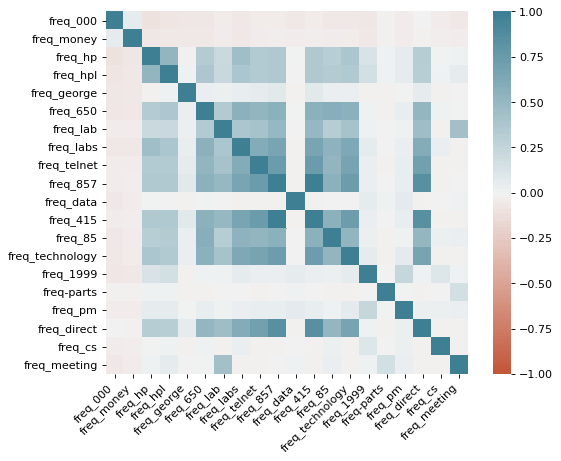

In [ ]:
corr = df_spam.iloc[:,22:42].corr() #take out the .iloc[] to have view of the full data correlation matrix
ds = plt.figure(figsize=(8, 6), dpi=80)
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);


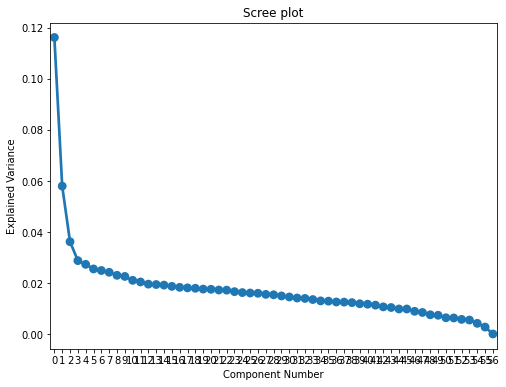

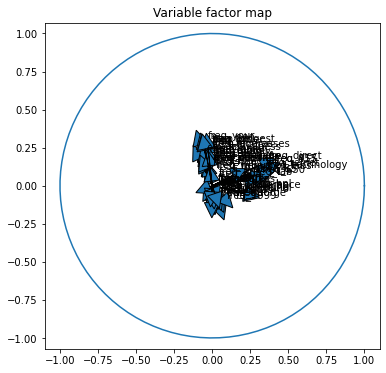

In [ ]:
df = pd.DataFrame(x_train,columns = ['freq_make', 'freq_adress', 'freq_all', 'freq_3d', 'freq_our',
       'freq_over', 'freq_remove', 'freq_internet', 'freq_order', 'freq_mail',
       'freq_receive', 'freq_will', 'freq_people', 'freq_report',
       'freq_addresses', 'freq_free', 'freq_business', 'freq_email',
       'freq_you', 'freq_credit', 'freq_your', 'freq_font', 'freq_000',
       'freq_money', 'freq_hp', 'freq_hpl', 'freq_george', 'freq_650',
       'freq_lab', 'freq_labs', 'freq_telnet', 'freq_857', 'freq_data',
       'freq_415', 'freq_85', 'freq_technology', 'freq_1999', 'freq-parts',
       'freq_pm', 'freq_direct', 'freq_cs', 'freq_meeting', 'freq_original',
       'freq_project', 'freq_re', 'freq_edu', 'freq_table', 'freq_conference',
       'freq_;', 'freq_(', 'freq_[', 'freq_!', 'freq_$', 'freq_#',
       'cap_average', 'cap_longest', 'cap_tot'])
n_components = len(df.columns)
 
#PCA.
pca = PCA(n_components=n_components)
reduced = pca.fit_transform(df)

# Appending the principle components for each entry to the dataframe
for i in range(0, n_components):
    df['PC' + str(i + 1)] = reduced[:, i]

#scree plot
ind = np.arange(0, n_components)
(fig, ax) = plt.subplots(figsize=(8, 6))
sns.pointplot(x=ind, y=pca.explained_variance_ratio_)
ax.set_title('Scree plot')
ax.set_xticks(ind)
ax.set_xticklabels(ind)
ax.set_xlabel('Component Number')
ax.set_ylabel('Explained Variance')
plt.show()

# Plot a variable factor map for the first two dimensions.
(fig, ax) = plt.subplots(figsize=(6, 6))

for i in range(0, pca.components_.shape[1]):
    ax.arrow(0,
             0,  # Start the arrow at the origin
             pca.components_[0, i],  #0 for PC1
             pca.components_[1, i],  #1 for PC2
             head_width=0.1,
             head_length=0.1)

    plt.text(pca.components_[0, i] + 0.05,
             pca.components_[1, i] + 0.05,
             df.columns.values[i])

an = np.linspace(0, 2 * np.pi, 100)
plt.plot(np.cos(an), np.sin(an))  # Add a unit circle for scale
plt.axis('equal')
ax.set_title('Variable factor map')
plt.show()

In [ ]:
#2D PCA for visualisation
import plotly.express as px


pca = PCA(n_components=2)
components = pca.fit_transform(x_train)
fig = px.scatter(components, x=0, y=1, color=y_train)
fig.show()

In [ ]:
#3D PCA
X = pd.DataFrame(x)

pca = PCA(n_components=3)
components = pca.fit_transform(X)

total_var = pca.explained_variance_ratio_.sum() * 100

fig = px.scatter_3d(
    components, x=0, y=1, z=2, color=y,
    title=f'Total Explained Variance: {total_var:.2f}%',
    labels={'0': 'PC 1', '1': 'PC 2', '2': 'PC 3'}
)
fig.show()

**k-nearest neighbors** 

In [ ]:
#code from https://towardsdatascience.com/knn-using-scikit-learn-c6bed765be75
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
#running k from  to  to 100
k_range = range(1,20)
scores = {}
scores_list = []
for k in k_range:
  knn = KNeighborsClassifier(n_neighbors = k)
  knn.fit(x_train,y_train)
  y_pred = knn.predict(x_test)
  scores[k] = metrics.accuracy_score(y_test,y_pred)
  scores_list.append(metrics.accuracy_score(y_test,y_pred))

Text(0, 0.5, 'Testing accuracy')

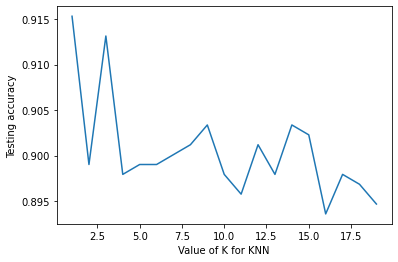

In [ ]:
#plotting of the results 
#Best results with k = 1 or k = 3
plt.plot(k_range, scores_list)
plt.xlabel("Value of K for KNN")
plt.ylabel("Testing accuracy")

In [ ]:
def Precision(method):
  #test et fitting du modèle 
  clf = method #KNeighborsClassifier(n_neighbors = 1)
  clf.fit(x_train,y_train)
  pred1 = clf.predict(x_train)
  pred2 = clf.predict(x_test)

  #précision du modèle 
  tot1 = len(pred1)
  s = 0
  for i,j in zip(pred1,y_train) :
      if i == j :
          s +=1 
  print("la précision sur le training set est de " + str(round(s/tot1,4)*100) + "%")
  tot2 = len(pred2)
  s = 0
  for i,j in zip(pred2,y_test) :
      if i == j :
          s +=1 
  print("la précision sur le test set est de " + str(round(s/tot2,4)*100) + "%")


In [ ]:
Precision(KNeighborsClassifier(n_neighbors = 1))
Precision(KNeighborsClassifier(n_neighbors = 3))

la précision sur le training set est de 99.95%
la précision sur le test set est de 91.53%
la précision sur le training set est de 95.0%
la précision sur le test set est de 91.31%


**Random forest Classifier**


1 Accuracy: 0.9120521172638436
2 Accuracy: 0.9055374592833876
3 Accuracy: 0.9305103148751357
4 Accuracy: 0.9229098805646037
5 Accuracy: 0.9402823018458197
6 Accuracy: 0.9435396308360477
7 Accuracy: 0.9533116178067318
8 Accuracy: 0.9413680781758957
9 Accuracy: 0.9533116178067318
10 Accuracy: 0.9511400651465798
11 Accuracy: 0.9511400651465798
12 Accuracy: 0.9576547231270358
13 Accuracy: 0.9565689467969598
14 Accuracy: 0.9511400651465798
15 Accuracy: 0.9674267100977199
16 Accuracy: 0.9533116178067318
17 Accuracy: 0.9576547231270358
18 Accuracy: 0.9565689467969598
19 Accuracy: 0.9500542888165038
20 Accuracy: 0.9565689467969598
21 Accuracy: 0.9641693811074918
22 Accuracy: 0.9543973941368078
23 Accuracy: 0.9543973941368078
24 Accuracy: 0.9576547231270358
25 Accuracy: 0.9598262757871878
26 Accuracy: 0.9587404994571118
27 Accuracy: 0.9554831704668838
28 Accuracy: 0.9587404994571118
29 Accuracy: 0.9598262757871878
30 Accuracy: 0.9565689467969598
31 Accuracy: 0.9576547231270358
32 Accuracy: 0.95

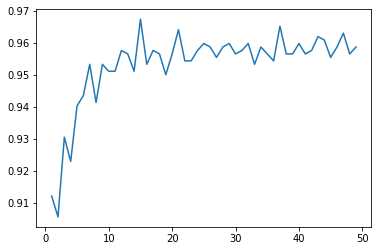

In [ ]:
#from  https://www.datacamp.com/community/tutorials/random-forests-classifier-python
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier
accuracy = []
for n_estimator in range(1,50):
  #Create a Gaussian Classifier
  clf=RandomForestClassifier(n_estimators=n_estimator)

  #Train the model using the training sets y_pred=clf.predict(X_test)
  clf.fit(x_train,y_train)

  y_pred=clf.predict(x_test)

  #Import scikit-learn metrics module for accuracy calculation
  from sklearn import metrics
  # Model Accuracy, how often is the classifier correct?
  print(n_estimator,"Accuracy:"    ,metrics.accuracy_score(y_test, y_pred))
  accuracy.append(metrics.accuracy_score(y_test, y_pred))
plt.plot(range(1,50),accuracy)

In [ ]:
Precision(RandomForestClassifier(n_estimators=20))

la précision sur le training set est de 99.81%
la précision sur le test set est de 95.87%


**Artificial Neural Network**

In [ ]:
model = keras.models.Sequential()
model.add(keras.layers.Dense(58,activation="relu"))
model.add(keras.layers.Dropout(0.20))
model.add(keras.layers.Dense(30,activation="relu"))
model.add(keras.layers.Dense(2,activation="softmax"))
model.compile(optimizer=keras.optimizers.SGD(learning_rate=0.05),loss="sparse_categorical_crossentropy",metrics=["accuracy"])

In [ ]:
history = model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=150)

Epoch 1/150
115/115 [==============================] - 1s 3ms/step - loss: 0.4073 - accuracy: 0.8304 - val_loss: 0.2666 - val_accuracy: 0.8969
Epoch 2/150
115/115 [==============================] - 0s 2ms/step - loss: 0.2721 - accuracy: 0.8967 - val_loss: 0.2256 - val_accuracy: 0.9131
Epoch 3/150
115/115 [==============================] - 0s 2ms/step - loss: 0.2297 - accuracy: 0.9158 - val_loss: 0.2109 - val_accuracy: 0.9283
Epoch 4/150
115/115 [==============================] - 0s 2ms/step - loss: 0.2091 - accuracy: 0.9220 - val_loss: 0.2019 - val_accuracy: 0.9316
Epoch 5/150
115/115 [==============================] - 0s 2ms/step - loss: 0.1944 - accuracy: 0.9299 - val_loss: 0.1982 - val_accuracy: 0.9327
Epoch 6/150
115/115 [==============================] - 0s 2ms/step - loss: 0.1970 - accuracy: 0.9318 - val_loss: 0.2005 - val_accuracy: 0.9327
Epoch 7/150
115/115 [==============================] - 0s 2ms/step - loss: 0.1899 - accuracy: 0.9296 - val_loss: 0.1875 - val_accuracy: 0.9316

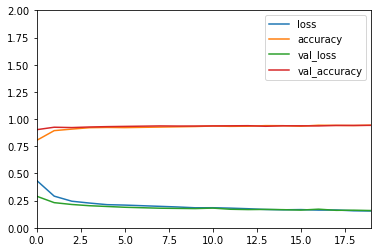

In [ ]:
#précision du modèle 
pd.DataFrame(history.history).plot()
plt.axis([0, 19, 0, 2])
plt.show()
#on remarque qu'il y a de l'overfitting

**Support Vector Machines Classification : SVC**

In [ ]:
Precision(svm.SVC())

la précision sur le training set est de 94.84%
la précision sur le test set est de 93.38%


**Experimental method : Mixing ANN and SVC**

In [ ]:
#test et fitting du modèle svc
clf = RandomForestClassifier(n_estimators=20)#KNeighborsClassifier(n_neighbors = 1)#svm.SVC()
clf.fit(x_train,y_train)
pred1 = clf.predict(x_train)
pred2 = clf.predict(x_test)

y_prob = model.predict(x_test)
rnpred = y_prob.argmax(axis=1)
y_prob = y_prob.round(2)
pred3 = []
for i in range(len(pred2)) : 
    if rnpred[i] == pred2[i] : 
        pred3.append(pred2[i])
    else : 
        if y_prob[i][0] >= 0.95 : #if the decision of the ANN isn't very clear (<95%) we use an alternative predicator, 
            pred3.append(0)       #Random Forest is the most accurate of the three tested models 
        elif y_prob[i][1] >= 0.95 :
            pred3.append(1)
        else : 
            pred3.append(pred2[i])

tot2 = len(pred2)
s = 0
for i,j in zip(pred3,y_test) :
    if i == j :
        s +=1 
print("la précision final est de " + str(round(s/tot2,4)*100) + "%")

la précision final est de 96.41999999999999%
